In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False
from PIL import Image

In [2]:
import mglearn

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC, SVR
from sklearn.svm import LinearSVC, LinearSVR

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve


from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import fetch_california_housing

In [3]:
from sklearn.tree import export_graphviz
import graphviz

In [4]:
# Suppoert Vector Machine
# 선형이냐 비선형이냐로 2가지 분리
# 선형에서 분류냐 회귀냐로 2가지로 분리
# 비선형에서 분류냐 회귀냐로 2가지로 분리
# 총 4가지의 사용기법

# 1. 특징

- 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
- 클래스 사이의 경계에 위치한 데이터 포인터를 서포트 벡터라고 한다.
- 각 서포트 벡터가 클래스 사이의 결정 경계를 구분하는 데 얼마나 중요한지를 학습
- 각 서포트 벡터 사이의 마진이 가장 큰 방향으로 학습
- 서포트 벡터까지의 거리와 서포트 벡터의 중요도를 기반으로 예측을 수행
- 관련 클래스
    - 회귀, 분류 : SVR, SVC
    - 선형, 비선형(커널) : LinearSVC, LinearSVR
    
- 메인은 분류
- 회귀는 다른 모델에 비해 결과값에 대해 장담을 못함

# 2. 커널 기법

In [5]:
from sklearn.datasets import make_blobs

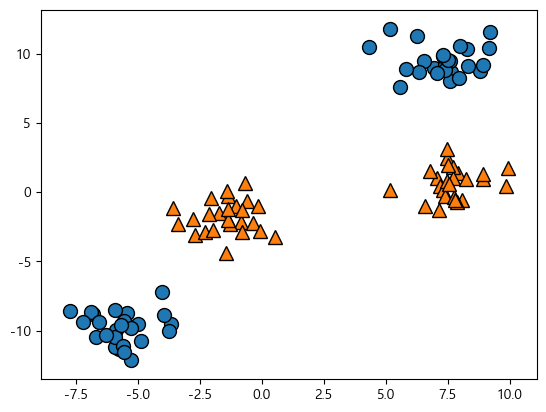

In [6]:
X, y = make_blobs(random_state=8, centers=4)

# 이진분류
y = y%2

mglearn.discrete_scatter(X[:, 0], X[:, 1],y)
plt.show()

C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


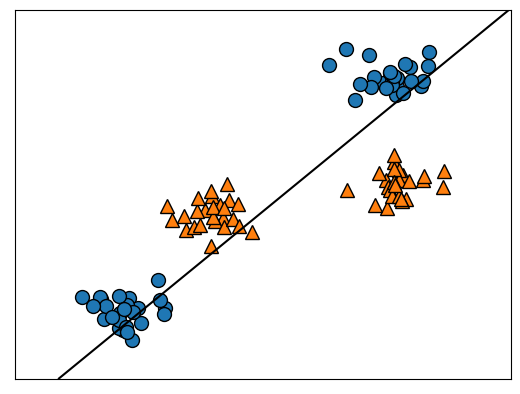

In [7]:
linear_svm = LinearSVC().fit(X, y)

mglearn.discrete_scatter(X[:, 0], X[:, 1],y)
mglearn.plots.plot_2d_separator(linear_svm, X)
plt.show()

C:\Users\acorn\AppData\Local\Temp\ipykernel_17432\4258159063.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, '특성1 ** 2')

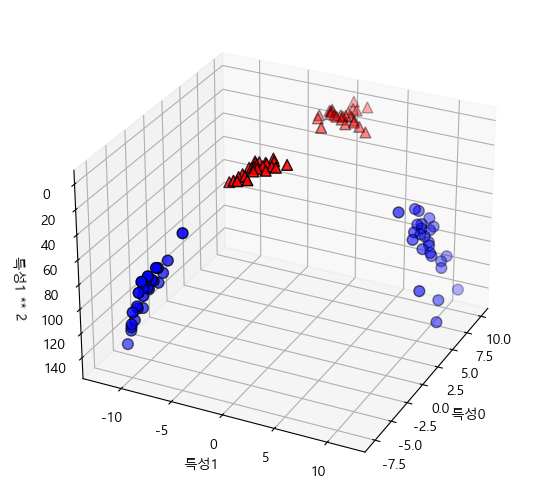

In [8]:
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)

mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60,  edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\acorn\AppData\Local\Temp\ipykernel_17432\1506119370.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, '특성1 ** 2')

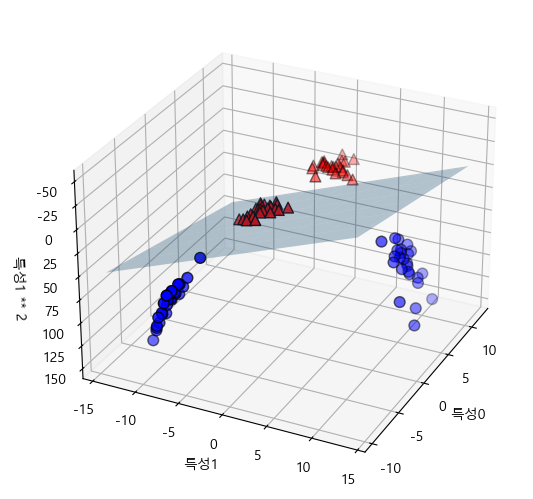

In [9]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60,  edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

Text(0, 0.5, '특성 1')

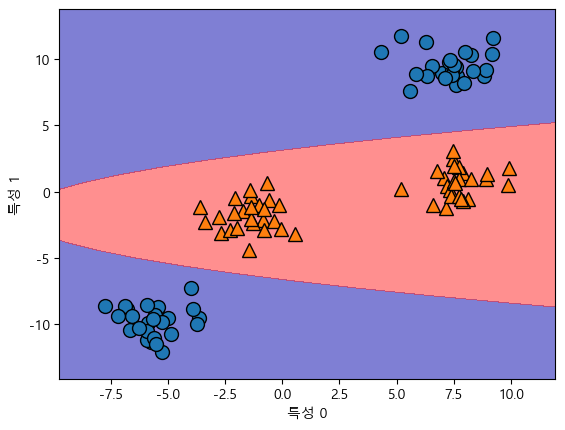

In [10]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], 
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

# 3. 하이퍼 파라미터

- cost
    - decision boundary와 마진의 간격을 어느 정도로 할 것인지를 결정
    - cost가 작을수록 마진이 넓어진다.
    
- gamma
    - 훈련 데이터 하나 당 영향을 끼치는 범위를 조절하는 변수
    - gamma가 작을수록 영향을 끼치는 범위가 넓어진다.

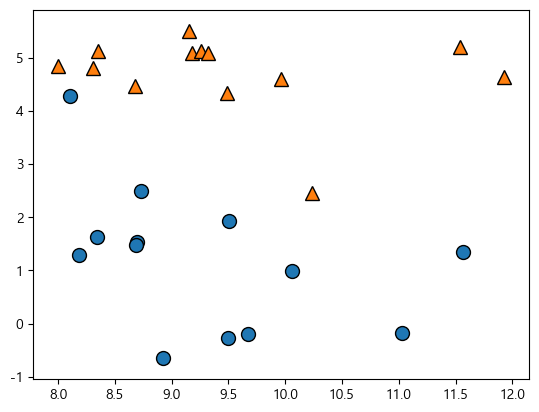

In [11]:
X, y = mglearn.tools.make_handcrafted_dataset() # , centers=8

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.show()

In [12]:
svm = SVC(kernel = "rbf", C=10, gamma=0.1).fit(X, y) # c = cost, gamma = 'scale' : 자동으로 맞춰주겠다.

In [13]:
?SVC

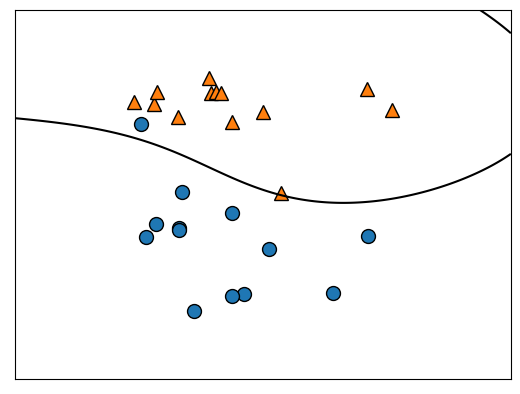

In [14]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(svm, X)

In [15]:
sv = svm.support_vectors_

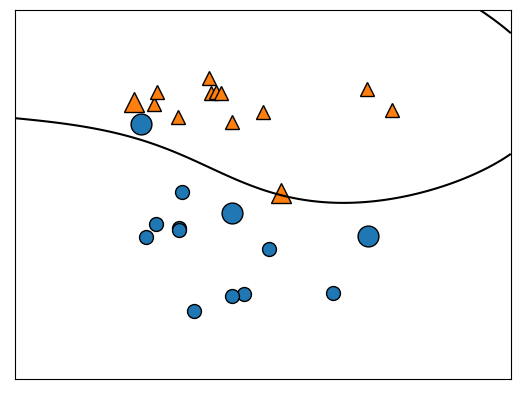

In [16]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(svm, X)

sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15)

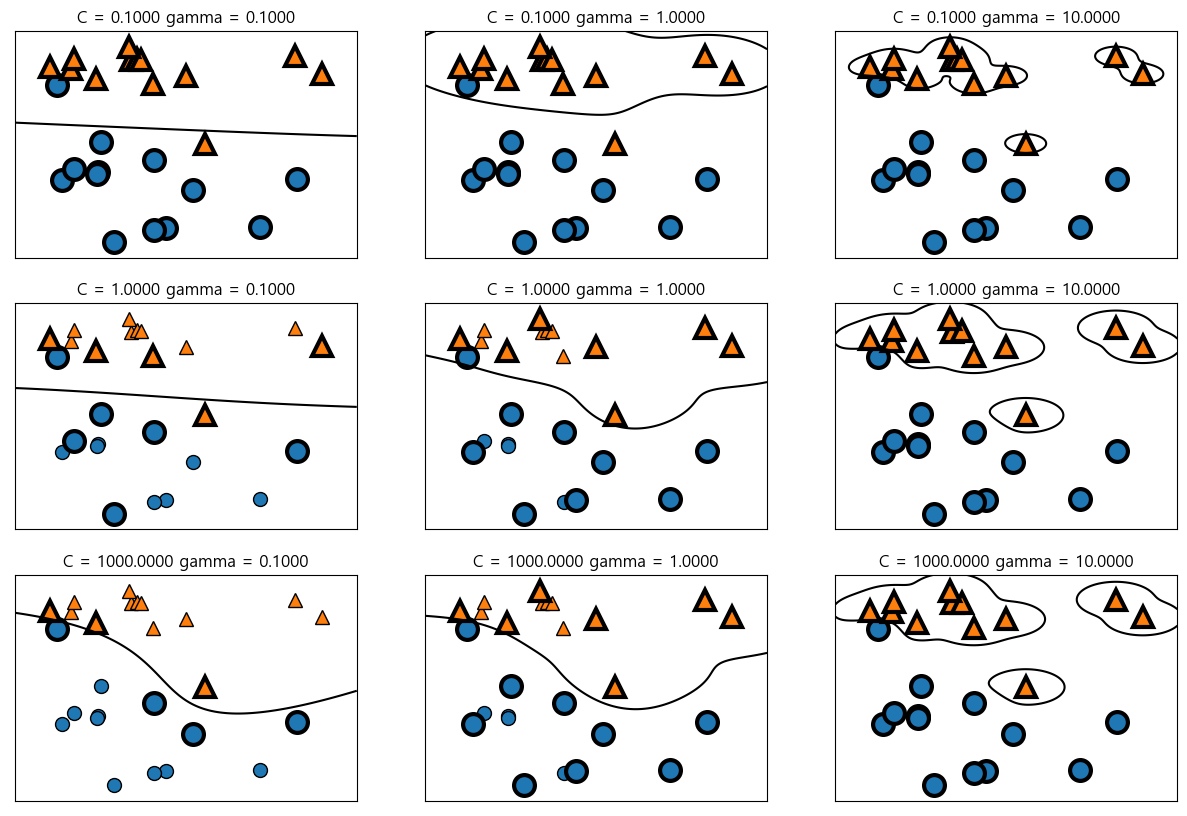

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C = C, log_gamma = gamma, ax=a)

# 4. SVM 클래스 사용법

### (1) 회귀 모델과 분류 모델

### 1) 회귀 모델(SVR)

In [18]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1)

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state = 123)

In [19]:
california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, random_state = 123)

In [20]:
X, y = fetch_california_housing(return_X_y = True) # return_X_y = True : X, y에 바로 data&target 자동 설정

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

In [21]:
model = SVR() # 기본값 svr # 보통 결과가 좋지 않음
model.fit(X_train, y_train)

SVR()

In [22]:
print("학습 결과 : ", model.score(X_train, y_train))
print("test 결과 : ", model.score(X_test, y_test))

학습 결과 :  -0.023880374340716992
test 결과 :  -0.014866881243793095


### 2) 분류 모델(SVC)

In [23]:
X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

In [24]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [25]:
print("학습 결과 : ", model.score(X_train, y_train))
print("test 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.9014084507042254
test 결과 :  0.9230769230769231


## (2) 커널 기법

- 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
- scikit-learn에서는 Linear, Polynomial, rbf(Radial Basis Function) 등 다양한 커널기법을 지원

### 1) 회귀 모델(SVR)

In [26]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1)

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state = 123)

In [27]:
model = SVR(kernel="linear")
model.fit(X_train, y_train)

SVR(kernel='linear')

In [28]:
print("학습 결과 : ", model.score(X_train, y_train))
print("test 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.7155066205123104
test 결과 :  0.6380398541381507


### 2) 분류 모델(SVC)

In [29]:
X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

In [30]:
# 분류지만 linear를 써보겠다 # 분류는 어지간해선 결과값이 제대로 나온다
model = SVC(kernel="linear")
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("test 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.960093896713615
test 결과 :  0.986013986013986


In [31]:
model = SVC(kernel="poly")
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("test 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.9014084507042254
test 결과 :  0.9230769230769231


In [32]:
model = SVC(kernel="rbf")
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("test 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.9014084507042254
test 결과 :  0.9230769230769231


## (3) 하이퍼 파라미터 튜닝

In [33]:
X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

In [34]:
model = SVC(kernel="poly", C=0.1, gamma = "auto")
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("test 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.971830985915493
test 결과 :  0.986013986013986


In [35]:
model = SVC(kernel="rbf", C=100, gamma = "scale")
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("test 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.9295774647887324
test 결과 :  0.958041958041958


### (4) 정규화, 표준화
- SVM에서는 정규화 표준화가 최고의 파라미터
- 정규화 표준화에 매우 민감하다

In [36]:
X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

In [37]:
### 표준화

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [38]:
model = SVC(kernel="rbf")
model.fit(X_train_std, y_train)

print("학습 결과 : ", model.score(X_train_std, y_train))
print("test 결과 : ", model.score(X_test_std, y_test))

학습 결과 :  0.9835680751173709
test 결과 :  0.986013986013986


In [39]:
# 정규화

scaler = MinMaxScaler()
X_train_mm = scaler.fit_transform(X_train)
X_test_mm = scaler.transform(X_test)

In [40]:
model = SVC(kernel="rbf")
model.fit(X_train_mm, y_train)

print("학습 결과 : ", model.score(X_train_mm, y_train))
print("test 결과 : ", model.score(X_test_mm, y_test))

학습 결과 :  0.9812206572769953
test 결과 :  0.986013986013986


## (5) 선형모델과의 비교

- boston

In [41]:
boston = fetch_openml(name='boston', version=1)

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state = 123)

In [42]:
model = LinearSVR(max_iter=100000, random_state=42).fit(X_train, y_train)

C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [43]:
print("학습결과 : ", model.score(X_train, y_train))
print("test결과 : ", model.score(X_test, y_test))

학습결과 :  0.7136313575857627
test결과 :  0.6340278153104038


C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


- diabetes

In [44]:
from sklearn.datasets import load_diabetes

In [45]:
X, y = load_diabetes(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 123)

In [46]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearSVR(max_iter=100000, C=0.01, random_state=42).fit(X_train, y_train).fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("test 결과 : ", model.score(X_test, y_test))

학습 결과 :  -3.4556731652278208
test 결과 :  -3.13518460026766


In [47]:
X, y = load_diabetes(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 123)

In [48]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = SVR(kernel="linear", C=0.01).fit(X_train, y_train).fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("test 결과 : ", model.score(X_test, y_test))

학습 결과 :  -0.01945465453363804
test 결과 :  -0.012896232779557648


In [49]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = SVR(kernel="linear", C=100).fit(X_train, y_train).fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("test 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.49420512314962195
test 결과 :  0.5777289310354563


- 파라미터의 영향을 매우 크게 받는다(C = 0.01 vs C = 100)
- 그래서 linearSVC나 linearSVR을 자주 쓰지 않는다

## (6) Pipe Line

In [50]:
from sklearn.pipeline import make_pipeline, Pipeline

### 1) Boston housing

In [51]:
boston = fetch_openml(name='boston', version=1)

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state = 123)

In [52]:
estimator = make_pipeline(StandardScaler(), SVR(kernel = "linear")) # 알아서 정규화를 해주고, 학습까지 해주는 기법 # 변수에 저장

In [53]:
cross_validate(estimator=estimator, X=X_train, y=y_train, cv=5, n_jobs=-1, verbose=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.2s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


{'fit_time': array([0.01110339, 0.01225233, 0.01137328, 0.01101804, 0.01031685]),
 'score_time': array([0.0020628 , 0.00206184, 0.00200248, 0.00204444, 0.00206065]),
 'test_score': array([0.67045643, 0.83334124, 0.69370893, 0.74817853, 0.61467997])}

In [54]:
estimator.steps

[('standardscaler', StandardScaler()), ('svr', SVR(kernel='linear'))]

In [55]:
estimator.fit(X_train, y_train)

print("학습 결과 : ", estimator.score(X_train, y_train))
print("test 결과 : ", estimator.score(X_test, y_test))

학습 결과 :  0.7161408576652015
test 결과 :  0.640254094777322


In [56]:
pipe = Pipeline([('scaler', MinMaxScaler()),
                ('model', SVR(kernel = 'linear'))])

In [57]:
pipe.steps

[('scaler', MinMaxScaler()), ('model', SVR(kernel='linear'))]

In [58]:
pipe.fit(X_train, y_train)

print("학습 결과 : ", pipe.score(X_train, y_train))
print("test 결과 : ", pipe.score(X_test, y_test))

학습 결과 :  0.6384958189464669
test 결과 :  0.6178479656646336


In [59]:
params = [{"model__gamma" : ["scale", "auto"],
          "model__C" : [1.0, 0.1, 0.01],
          "model__epsilon" : [1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=params, n_jobs = -1, cv = 5, verbose = True)

gs.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=-1,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [60]:
print(gs.best_estimator_)
print(gs.best_params_)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', SVR(epsilon=1.0, kernel='linear'))])
{'model__C': 1.0, 'model__epsilon': 1.0, 'model__gamma': 'scale'}


In [61]:
model = SVR(kernel = "linear", C=1.0, gamma = "scale", epsilon=1.0)
model.fit(X_train, y_train)


print("학습 결과 : ", model.score(X_train, y_train))
print("test 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.7233760661973168
test 결과 :  0.6438340317593632


### 2) Breast Cancer Sample

In [62]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 123)

In [63]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [64]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = "linear")) # 알아서 정규화를 해주고, 학습까지 해주는 기법 # 변수에 저장

In [65]:
cross_validate(estimator=estimator, X=X_train, y=y_train, cv=5, n_jobs=-1, verbose=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00205994, 0.00302625, 0.00294232, 0.00294232, 0.00192928]),
 'score_time': array([0.00096631, 0.        , 0.        , 0.        , 0.00099707]),
 'test_score': array([1.        , 0.95294118, 0.96470588, 0.97647059, 0.92941176])}

In [66]:
estimator.steps

[('standardscaler', StandardScaler()), ('svc', SVC(kernel='linear'))]

In [67]:
estimator.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [68]:
print("학습 결과 : ", estimator.score(X_train, y_train))
print("test 결과 : ", estimator.score(X_test, y_test))

학습 결과 :  0.9906103286384976
test 결과 :  0.986013986013986


In [69]:
pipe = Pipeline([('scaler', MinMaxScaler()),
                ('model', SVC(kernel = 'poly'))])

In [70]:
pipe.steps

[('scaler', MinMaxScaler()), ('model', SVC(kernel='poly'))]

In [71]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', SVC(kernel='poly'))])

In [72]:
print("학습 결과 : ", pipe.score(X_train, y_train))
print("test 결과 : ", pipe.score(X_test, y_test))

학습 결과 :  0.9859154929577465
test 결과 :  0.986013986013986


In [73]:
estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'svc', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

In [74]:
params = [{"model__kernel" : ["rbf", "poly", "sigmoid"],
            "model__gamma" : ["scale", "auto"],
           "model__C" : [1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=params, n_jobs = -1, cv = 5, verbose = True)

In [75]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model', SVC(kernel='poly'))]),
             n_jobs=-1,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto'],
                          'model__kernel': ['rbf', 'poly', 'sigmoid']}],
             verbose=True)

In [76]:
print(gs.best_estimator_)
print(gs.best_params_)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', SVC())])
{'model__C': 1.0, 'model__gamma': 'scale', 'model__kernel': 'rbf'}


In [77]:
model = SVC(kernel = "poly", C=1.0, gamma = "scale")
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("test 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.9014084507042254
test 결과 :  0.9230769230769231


In [78]:
model = SVC(kernel = "rbf", C=1.0, gamma = "scale")
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("test 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.9014084507042254
test 결과 :  0.9230769230769231


In [79]:
model = SVC(kernel = "sigmoid", C=1.0, gamma = "scale")
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("test 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.45774647887323944
test 결과 :  0.4125874125874126


### 3) Iris Sample

In [80]:
iris = load_iris()

In [81]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [82]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 123)

In [83]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = "linear")) # 알아서 정규화를 해주고, 학습까지 해주는 기법 # 변수에 저장

In [84]:
cross_validate(estimator=estimator, X=X_train, y=y_train, cv=5, n_jobs=-1, verbose=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00102782, 0.00100493, 0.00100493, 0.00202942, 0.00102448]),
 'score_time': array([0.00100493, 0.        , 0.        , 0.        , 0.        ]),
 'test_score': array([1.        , 1.        , 0.90909091, 1.        , 0.95454545])}

In [85]:
estimator.steps

[('standardscaler', StandardScaler()), ('svc', SVC(kernel='linear'))]

In [86]:
estimator.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [87]:
print("학습 결과 : ", estimator.score(X_train, y_train))
print("test 결과 : ", estimator.score(X_test, y_test))

학습 결과 :  0.9910714285714286
test 결과 :  0.9736842105263158


In [88]:
pipe = Pipeline([('scaler', MinMaxScaler()),
                ('model', SVC(kernel = 'poly'))])

In [89]:
pipe.steps

[('scaler', MinMaxScaler()), ('model', SVC(kernel='poly'))]

In [90]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', SVC(kernel='poly'))])

In [91]:
print("학습 결과 : ", pipe.score(X_train, y_train))
print("test 결과 : ", pipe.score(X_test, y_test))

학습 결과 :  0.9910714285714286
test 결과 :  0.9210526315789473


In [92]:
estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'svc', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

In [93]:
params = [{"model__kernel" : ["rbf", "poly", "sigmoid"],
            "model__gamma" : ["scale", "auto"],
           "model__C" : [1.0, 0.1, 0.01]}]
gs = GridSearchCV(estimator=pipe, param_grid=params, n_jobs = -1, cv = 5, verbose = True)

In [94]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model', SVC(kernel='poly'))]),
             n_jobs=-1,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto'],
                          'model__kernel': ['rbf', 'poly', 'sigmoid']}],
             verbose=True)

In [95]:
print(gs.best_estimator_)
print(gs.best_params_)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', SVC())])
{'model__C': 1.0, 'model__gamma': 'scale', 'model__kernel': 'rbf'}


In [96]:
model = SVC(kernel = "rbf", C=1.0, gamma = "scale")
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("test 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.9642857142857143
test 결과 :  0.9736842105263158


### 4) Wine Sample

In [97]:
wine = pd.read_csv("data/wine.csv")

In [98]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [99]:
X = wine[wine.columns[1:-1]] # 앞에서 CAR_ID빼고, 뒤에서 price빼고
X.head()

,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [100]:
y = wine[[wine.columns[-1]]]
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 123)

print(X_train.shape, X_test.shape)

(1279, 10) (320, 10)


In [102]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = "linear")) # 알아서 정규화를 해주고, 학습까지 해주는 기법 # 변수에 저장

In [103]:
cross_validate(estimator=estimator, X=X_train, y=y_train, cv=5, n_jobs=-1, verbose=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.04840159, 0.05039668, 0.05239105, 0.04740453, 0.04640722]),
 'score_time': array([0.00698161, 0.0070467 , 0.0070467 , 0.0070281 , 0.0070281 ]),
 'test_score': array([0.59375   , 0.5546875 , 0.6171875 , 0.609375  , 0.58823529])}

In [104]:
estimator.steps

[('standardscaler', StandardScaler()), ('svc', SVC(kernel='linear'))]

In [105]:
estimator.fit(X_train, y_train)

C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [106]:
print("학습 결과 : ", estimator.score(X_train, y_train))
print("test 결과 : ", estimator.score(X_test, y_test))

학습 결과 :  0.5989053948397185
test 결과 :  0.528125


In [107]:
pipe = Pipeline([('scaler', MinMaxScaler()),
                ('model', SVC(kernel = 'poly'))])

In [108]:
pipe.steps

[('scaler', MinMaxScaler()), ('model', SVC(kernel='poly'))]

In [109]:
pipe.fit(X_train, y_train)

C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('scaler', MinMaxScaler()), ('model', SVC(kernel='poly'))])

In [110]:
print("학습 결과 : ", pipe.score(X_train, y_train))
print("test 결과 : ", pipe.score(X_test, y_test))

학습 결과 :  0.6763096168881939
test 결과 :  0.571875


In [111]:
estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'svc', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

In [112]:
params = [{"model__kernel" : ["rbf", "poly", "sigmoid"],
            "model__gamma" : ["scale", "auto"],
           "model__C" : [1.0, 0.1, 0.01]}]
gs = GridSearchCV(estimator=pipe, param_grid=params, n_jobs = -1, cv = 5, verbose = True)

In [113]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model', SVC(kernel='poly'))]),
             n_jobs=-1,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto'],
                          'model__kernel': ['rbf', 'poly', 'sigmoid']}],
             verbose=True)

In [114]:
print(gs.best_estimator_)
print(gs.best_params_)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', SVC())])
{'model__C': 1.0, 'model__gamma': 'scale', 'model__kernel': 'rbf'}


In [115]:
model = SVC(kernel = "rbf", C=1.0, gamma = "scale")
model.fit(X_train, y_train)
print("학습 결과 : ", model.score(X_train, y_train))
print("test 결과 : ", model.score(X_test, y_test))

C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습 결과 :  0.5043002345582487
test 결과 :  0.5125


In [116]:
model = SVC(kernel = "rbf", C=10000, gamma = "scale")
model.fit(X_train, y_train)
print("학습 결과 : ", model.score(X_train, y_train))
print("test 결과 : ", model.score(X_test, y_test))

C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습 결과 :  0.6653635652853792
test 결과 :  0.553125


In [117]:
model = SVC(kernel = "poly", C=1.0, gamma = "scale")
model.fit(X_train, y_train)
print("학습 결과 : ", model.score(X_train, y_train))
print("test 결과 : ", model.score(X_test, y_test))

C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습 결과 :  0.4847537138389367
test 결과 :  0.478125


In [118]:
model = SVC(kernel = "sigmoid", C=1.0, gamma = "scale")
model.fit(X_train, y_train)
print("학습 결과 : ", model.score(X_train, y_train))
print("test 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.3487099296325254
test 결과 :  0.346875


C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [119]:
model = SVC(kernel = "sigmoid", C=0.00001, gamma = "scale")
model.fit(X_train, y_train)
print("학습 결과 : ", model.score(X_train, y_train))
print("test 결과 : ", model.score(X_test, y_test))

C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습 결과 :  0.4300234558248632
test 결과 :  0.409375


### 5) 여행자 보험 Sample

In [154]:
ti = pd.read_csv("data/TravelInsurance.csv")

In [155]:
ti.head()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,400000,6,1,Government Sector,Yes,No,No,0
1,31,1250000,7,0,Private Sector/Self Employed,Yes,No,No,0
2,34,500000,4,1,Private Sector/Self Employed,Yes,No,No,1
3,28,700000,3,1,Private Sector/Self Employed,Yes,No,No,0
4,28,700000,8,1,Private Sector/Self Employed,Yes,Yes,No,0


In [156]:
X = ti[ti.columns[1:-1]] # 앞에서 CAR_ID빼고, 뒤에서 price빼고
y = ti[[ti.columns[-1]]]
X.head()

,AnnualIncome,FamilyMembers,ChronicDiseases,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
0,400000,6,1,Government Sector,Yes,No,No
1,1250000,7,0,Private Sector/Self Employed,Yes,No,No
2,500000,4,1,Private Sector/Self Employed,Yes,No,No
3,700000,3,1,Private Sector/Self Employed,Yes,No,No
4,700000,8,1,Private Sector/Self Employed,Yes,Yes,No


In [157]:
X_cat = X[X.columns[3:4]] # 범주형 변수(문자)
X_cat.head()

,Employment Type
0,Government Sector
1,Private Sector/Self Employed
2,Private Sector/Self Employed
3,Private Sector/Self Employed
4,Private Sector/Self Employed


In [158]:
X_cat["Employment Type"].value_counts()

Private Sector/Self Employed    1417
Government Sector                570
Name: Employment Type, dtype: int64

In [159]:
X_cat = pd.get_dummies(X_cat)
# 원핫 인코딩 후에는 인덱스가 꼬이는 경우가 많아 합칠 때 문제가 되는 경우가 많기 때문에 이상하게 배치된 인덱스를 지워주자
X_cat = X_cat.reset_index(drop=True)
X_cat.head()

,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [160]:
# 기존의 Employment Type 삭제 # X_cat을 병합할 것이기 때문에
X = X.drop('Employment Type', axis=1)
X.head()

,AnnualIncome,FamilyMembers,ChronicDiseases,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
0,400000,6,1,Yes,No,No
1,1250000,7,0,Yes,No,No
2,500000,4,1,Yes,No,No
3,700000,3,1,Yes,No,No
4,700000,8,1,Yes,Yes,No


In [161]:
# 원핫 인코딩 해준 X_cat이랑 X랑 합치기
X = pd.concat([X, X_cat], axis=1)

In [162]:
X.head()

,AnnualIncome,FamilyMembers,ChronicDiseases,GraduateOrNot,FrequentFlyer,EverTravelledAbroad,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed
0,400000,6,1,Yes,No,No,1,0
1,1250000,7,0,Yes,No,No,0,1
2,500000,4,1,Yes,No,No,0,1
3,700000,3,1,Yes,No,No,0,1
4,700000,8,1,Yes,Yes,No,0,1


In [163]:
# "GraduateOrNot", "FrequentFlyer", "EverTravelledAbroad" = 레이블 인코딩(범주형 처리)
features = ["GraduateOrNot", "FrequentFlyer", "EverTravelledAbroad"]

for f in features:
    le = LabelEncoder()
    le.fit(X[f])
    X[f] = le.transform(X[f])

In [164]:
X.head(3)

,AnnualIncome,FamilyMembers,ChronicDiseases,GraduateOrNot,FrequentFlyer,EverTravelledAbroad,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed
0,400000,6,1,1,0,0,1,0
1,1250000,7,0,1,0,0,0,1
2,500000,4,1,1,0,0,0,1


In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 123)

print(X_train.shape, X_test.shape)

(1589, 8) (398, 8)


In [166]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = "rbf")) # 알아서 정규화를 해주고, 학습까지 해주는 기법 # 변수에 저장

In [167]:
cross_validate(estimator=estimator, X=X_train, y=y_train, cv=5, n_jobs=-1, verbose=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


{'fit_time': array([0.06215143, 0.06015563, 0.05912304, 0.06215143, 0.06314802]),
 'score_time': array([0.0180099 , 0.01900887, 0.01904321, 0.02000546, 0.02000618]),
 'test_score': array([0.75786164, 0.78616352, 0.7672956 , 0.78616352, 0.77287066])}

In [168]:
estimator.steps

[('standardscaler', StandardScaler()), ('svc', SVC())]

In [169]:
estimator.fit(X_train, y_train)

C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [170]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = "linear")) # 알아서 정규화를 해주고, 학습까지 해주는 기법 # 변수에 저장

cross_validate(estimator=estimator, X=X_train, y=y_train, cv=5, n_jobs=-1, verbose=True)

estimator.steps

estimator.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished
C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [171]:
print("학습 결과 : ", estimator.score(X_train, y_train))
print("test 결과 : ", estimator.score(X_test, y_test))

학습 결과 :  0.7413467589679044
test 결과 :  0.7914572864321608


In [172]:
pipe = Pipeline([('scaler', MinMaxScaler()),
                ('model', SVC(kernel = 'poly'))])

In [173]:
pipe.steps

[('scaler', MinMaxScaler()), ('model', SVC(kernel='poly'))]

In [174]:
pipe.fit(X_train, y_train)

C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('scaler', MinMaxScaler()), ('model', SVC(kernel='poly'))])

In [175]:
print("학습 결과 : ", pipe.score(X_train, y_train))
print("test 결과 : ", pipe.score(X_test, y_test))

학습 결과 :  0.7847702957835117
test 결과 :  0.8090452261306532


In [176]:
estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'svc', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

In [183]:
params = [{"model__kernel" : ["rbf", "poly", "sigmoid"],
            "model__gamma" : ["scale", "auto"],
           "model__C" : [1.0, 0.1, 0.01, 0.001]}]
gs = GridSearchCV(estimator=pipe, param_grid=params, n_jobs = -1, cv = 5, verbose = True)

In [184]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model', SVC(kernel='poly'))]),
             n_jobs=-1,
             param_grid=[{'model__C': [1.0, 0.1, 0.01, 0.001],
                          'model__gamma': ['scale', 'auto'],
                          'model__kernel': ['rbf', 'poly', 'sigmoid']}],
             verbose=True)

In [185]:
print(gs.best_estimator_)
print(gs.best_params_)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', SVC(kernel='poly'))])
{'model__C': 1.0, 'model__gamma': 'scale', 'model__kernel': 'poly'}


In [186]:
model = SVC(kernel = "poly", C=1.0, gamma = "scale")
model.fit(X_train, y_train)
print("학습 결과 : ", model.score(X_train, y_train))
print("test 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.7438640654499685
test 결과 :  0.7939698492462312


C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [187]:
model = SVC(kernel = "rbf", C=1.0, gamma = "scale")
model.fit(X_train, y_train)
print("학습 결과 : ", model.score(X_train, y_train))
print("test 결과 : ", model.score(X_test, y_test))

C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습 결과 :  0.7809943360604154
test 결과 :  0.8115577889447236


### 6) 농구선수의 포지션 예측

In [188]:
df = pd.read_csv("data/basketball_stat.csv")
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  100 non-null    object 
 1   Pos     100 non-null    object 
 2   3P      100 non-null    float64
 3   2P      100 non-null    float64
 4   TRB     100 non-null    float64
 5   AST     100 non-null    float64
 6   STL     100 non-null    float64
 7   BLK     100 non-null    float64
dtypes: float64(6), object(2)
memory usage: 6.4+ KB


In [190]:
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


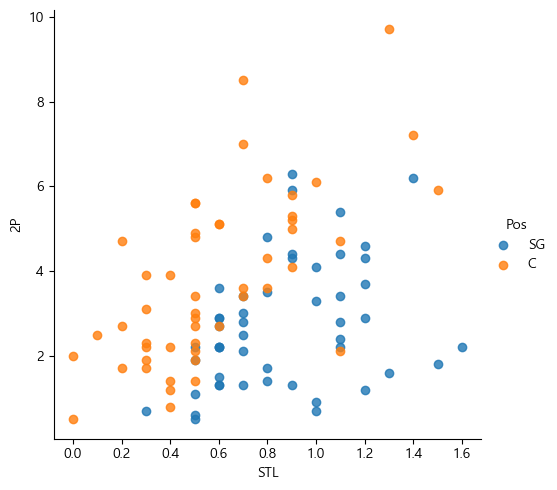

In [191]:
sns.lmplot("STL", "2P", data = df, fit_reg=False, hue="Pos")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


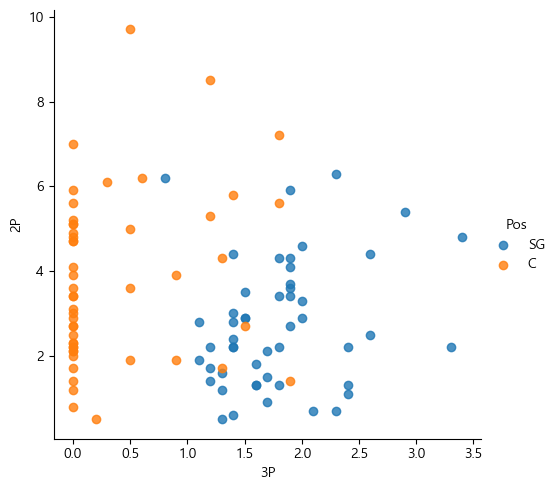

In [192]:
sns.lmplot("3P", "2P", data = df, fit_reg=False, hue="Pos")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


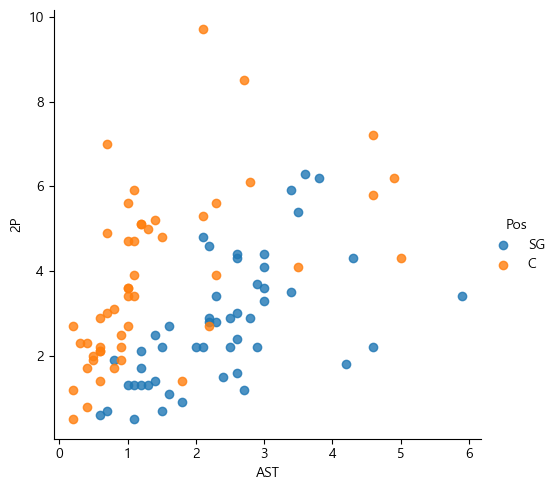

In [193]:
sns.lmplot("AST", "2P", data = df, fit_reg=False, hue="Pos")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


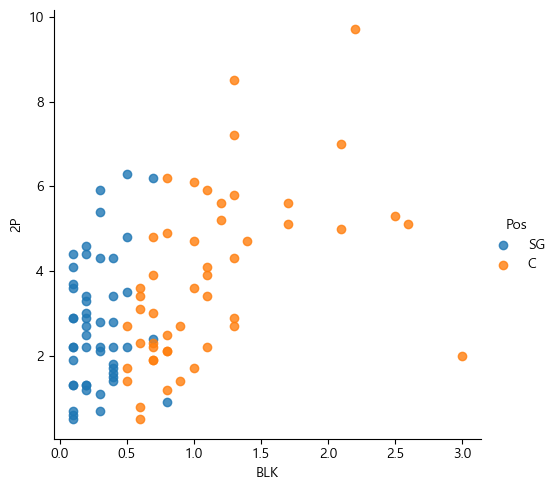

In [194]:
sns.lmplot("BLK", "2P", data = df, fit_reg=False, hue="Pos")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


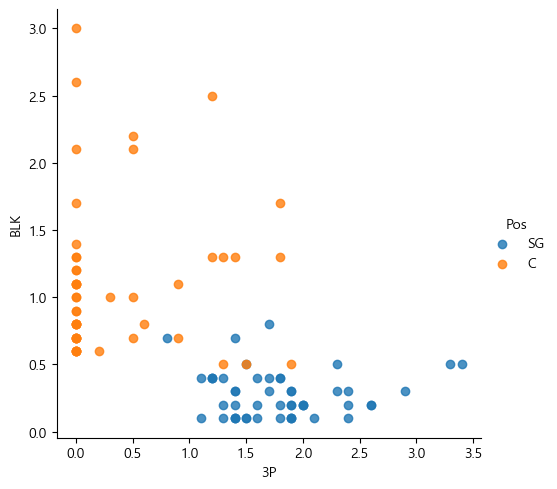

In [195]:
sns.lmplot("3P", "BLK", data = df, fit_reg=False, hue="Pos")

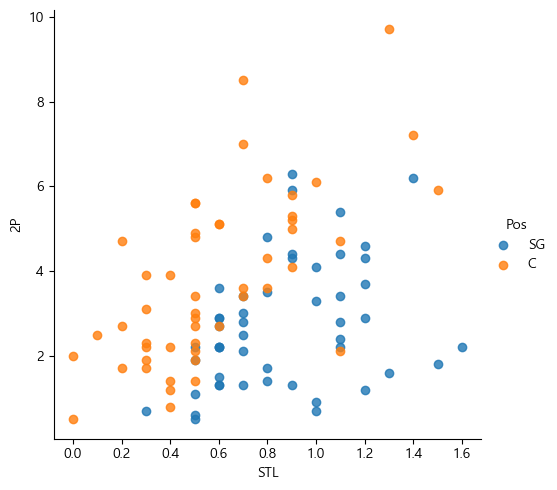

In [196]:
sns.lmplot(data=df, x="STL", y="2P", fit_reg=False, hue='Pos')

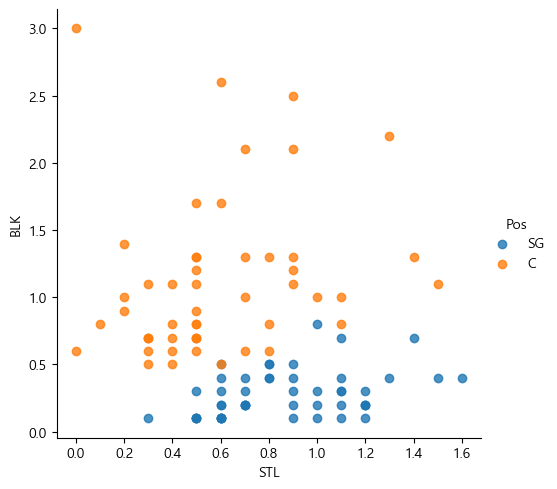

In [197]:
sns.lmplot(data=df, x="STL", y="BLK", fit_reg=False, hue='Pos')

In [198]:
df.drop(["2P","AST","STL"], axis=1, inplace=True)

In [199]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [200]:
train, test = train_test_split(df, test_size=.2)
print(train.shape, test.shape)

(80, 5) (20, 5)


In [202]:
#X_train = train[["3P", "TRB", "BLK", "2P", "AST", "STL"]]
X_train = train[["3P", "TRB", "BLK"]]
y_train = train[["Pos"]]

#X_test = test[["3P", "TRB", "BLK", "2P", "AST", "STL"]]
X_test = test[["3P", "TRB", "BLK"]]
y_test = test[["Pos"]]

In [203]:
params = [{"kernel" : ['rbf', 'poly', 'sigmoid'],
          "gamma" : ["scale", "auto"],
          "C" : [0.001, 0.1, 1.0, 10, 100, 1000]}]

svm = GridSearchCV(estimator=SVC(), param_grid=params).fit(X_train, y_train)

C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

In [204]:
svm.best_params_

{'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}

In [206]:
model = SVC(kernel = "poly", C=1.0, gamma = "auto")
model.fit(X_train, y_train)
print("학습 결과 : ", model.score(X_train, y_train))
print("test 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.95
test 결과 :  0.95


C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [205]:
pred = svm.predict(X_test)
print("정확도 : ", accuracy_score(y_test, pred))

정확도 :  0.95


### 7) 손글씨 이미지

In [207]:
def normal(n):
    return round(int(n)/256)

def load_csv(fname):
    labels = []
    images = []
    
    f = open(fname)
    for line in f:
        cols = line.split(",")
        if len(cols) < 2:
            continue
        
        labels.append(int(cols.pop(0))) # 첫번째 줄이 실제 정답임 # 그래서 label로 숫자형을 따로 넣어 모아줌
        images.append(list(map(normal, cols)))       
    f.close()
    return {"y" : labels, "X" : images}
        

In [208]:
train = load_csv("data/mnist/train.csv")
test = load_csv("data/mnist/t10k.csv")

In [209]:
print(train["X"][0])
print(test["X"][0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [210]:
print(train['y'][0])
print(test['y'][0])

5
7


In [211]:
model = SVC().fit(train["X"], train["y"])

In [212]:
pred = model.predict(test["X"])
print("정확도 : ", accuracy_score(test["y"], pred))

정확도 :  0.9540918163672655


In [213]:
print(classification_report(test["y"], pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       1.00      1.00      1.00        67
           2       0.96      0.95      0.95        55
           3       0.95      0.89      0.92        46
           4       0.96      0.98      0.97        55
           5       0.92      0.94      0.93        50
           6       0.95      0.93      0.94        43
           7       0.92      0.98      0.95        49
           8       0.91      0.97      0.94        40
           9       1.00      0.91      0.95        54

    accuracy                           0.95       501
   macro avg       0.95      0.95      0.95       501
weighted avg       0.96      0.95      0.95       501



## Service Launching

In [214]:
input_form = """
<table>
<td style="border-style: none;">
<div style="border: solid 2px #666; width: 143px; height: 144px;">
<canvas width="140" height="140"></canvas>
</div></td>
<td style="border-style: none;">
<button onclick="clear_value()">Clear</button>
</td>
</table>
"""

javascript = """
<script type="text/Javascript">
    var pixels = [];
    for (var i = 0; i < 28*28; i++) pixels[i] = 0
    var click = 0;
    var canvas = document.querySelector("canvas");
    canvas.addEventListener("mousemove", function(e){
        if (e.buttons == 1) {
            click = 1;
            canvas.getContext("2d").fillStyle = "rgb(0,0,0)";
            canvas.getContext("2d").fillRect(e.offsetX, e.offsetY, 8, 8);
            x = Math.floor(e.offsetY * 0.2)
            y = Math.floor(e.offsetX * 0.2) + 1
            for (var dy = 0; dy < 2; dy++){
                for (var dx = 0; dx < 2; dx++){
                    if ((x + dx < 28) && (y + dy < 28)){
                        pixels[(y+dy)+(x+dx)*28] = 1
                    }
                }
            }
        } else {
            if (click == 1) set_value()
            click = 0;
        }
    });
    
    function set_value(){
        var result = ""
        for (var i = 0; i < 28*28; i++) result += pixels[i] + ","
        var kernel = IPython.notebook.kernel;
        kernel.execute("image = [" + result + "]");
    }
    
    function clear_value(){
        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";
        canvas.getContext("2d").fillRect(0, 0, 140, 140);
        for (var i = 0; i < 28*28; i++) pixels[i] = 0
    }
</script>
"""

In [215]:
from IPython.display import HTML

In [216]:
HTML(input_form + javascript)

In [218]:
print(image)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 

In [219]:
model.predict([image])

array([4])

# 5. 학습 모델 저장

- pickle
- joblib

## (1) pickle

- Serializable(직렬화)

In [220]:
import pickle

In [221]:
# 피클로 저장하는 방법. 
phone = {"tom":"111-1111", "홍":"222-2222"}
product = ["마우스", "키보드"]

data = (phone, product)          # 복잡한 데이터라고 가정

f = open("data/data1.pickle", "wb")    # wb -> 2진수로 저장
pickle.dump(data, f)                   # f를 통해 데이터를 내보내겠다.

f.close()

In [222]:
f = open("data/data1.pickle", "rb") # f를 읽어오기

data2 = pickle.load(f)
f.close()

print(data2[1][0], data2[0]["홍"])

마우스 222-2222


In [223]:
#### 학습된 데이터 모델 저장 후 불러오기

X, y = load_iris(return_X_y=True)
model = SVC().fit(X, y)

In [224]:
f = open("data/iris_svc.pkl", "wb")
pickle.dump(model, f)
f.close()

In [225]:
f = open("data/iris_svc.pkl", "rb")
svc = pickle.load(f)
f.close()

svc.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## (2) joblib

In [226]:
import joblib

In [227]:
joblib.dump(model, "data/iris_svc1.pkl")

['data/iris_svc1.pkl']

In [228]:
svc1 = joblib.load("data/iris_svc1.pkl")

In [229]:
print(svc1.predict(X))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 2 2]
